In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [37]:
train_data.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,STANDING


In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [39]:
print(train_data.shape)
print(test_data.shape)

(7352, 563)
(2947, 563)


In [40]:
# Revisa datos faltantes
print(train_data.isnull().sum().sum()) # Reemplazar por imputación si hay valores nulos

0


In [41]:
# Codifica la columna 'Activity' si es tipo object
if train_data['Activity'].dtype == 'object':
    le = LabelEncoder()
    train_data['Activity'] = le.fit_transform(train_data['Activity'])

In [42]:
# Separa las características y la variable objetivo
X= train_data.drop('Activity', axis=1)
y= train_data['Activity']

In [43]:
# Escala las características
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [44]:
# Divide los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [45]:
# Entrena el modelo de Random Forest
model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
# Evaluación del modelo
y_pred= model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.9802855200543847
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.97      0.95      0.96       262
           2       0.96      0.97      0.96       276
           3       1.00      0.99      0.99       247
           4       0.99      0.98      0.99       206
           5       0.98      0.99      0.99       200

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



Implementacion de una Red Neuronal para el problema

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [48]:
data= pd.read_csv('train.csv')

In [49]:
if data['Activity'].dtype == 'object':
    le = LabelEncoder()
    data['Activity'] = le.fit_transform(data['Activity'])

In [50]:
X= data.drop('Activity', axis=1)
y= data['Activity']

In [51]:
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [52]:
# Codificacion one-hot de la variable objetivo
y_onehot= to_categorical(y)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)

In [54]:
# Construccioón de la red neuronal
model= Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax') # capa de salida
])

C:\Users\DEIVY\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
# Compilación del modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
# Entrenamiento del modelo
history= model.fit(X_train, y_train, epochs=30, 
                   batch_size=32, validation_data=(X_test, y_test), 
                   verbose=1, validation_split=0.2)

Epoch 1/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6418 - loss: 0.9360 - val_accuracy: 0.9239 - val_loss: 0.1777
Epoch 2/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9112 - loss: 0.2314 - val_accuracy: 0.9626 - val_loss: 0.1110
Epoch 3/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9389 - loss: 0.1532 - val_accuracy: 0.9579 - val_loss: 0.0954
Epoch 4/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9628 - loss: 0.1041 - val_accuracy: 0.9701 - val_loss: 0.0883
Epoch 5/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9644 - loss: 0.0991 - val_accuracy: 0.9674 - val_loss: 0.0789
Epoch 6/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9619 - loss: 0.0955 - val_accuracy: 0.9640 - val_loss: 0.0846
Epoch 7/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9739 - loss: 0.0686 - val_accuracy: 0.9640 - val_loss: 0.0966
Epoch 8/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9727 - loss: 0.0713 - val_accuracy: 0.

In [57]:
# Evaluación en el conjuntomde prueba
loss, accuracy= model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy:{accuracy:.4}')

Accuracy:0.9613


In [58]:
# Predicciones y Matriz de Confusión
y_pred= model.predict(X_test)
y_pred_classes= np.argmax(y_pred, axis=1)
y_true= np.argmax(y_test, axis=1)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [59]:
# Reporte de clasificación
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.92      0.98      0.95       262
           2       0.98      0.92      0.95       276
           3       0.92      1.00      0.96       247
           4       0.99      0.87      0.93       206
           5       0.96      0.99      0.97       200

    accuracy                           0.96      1471
   macro avg       0.96      0.96      0.96      1471
weighted avg       0.96      0.96      0.96      1471



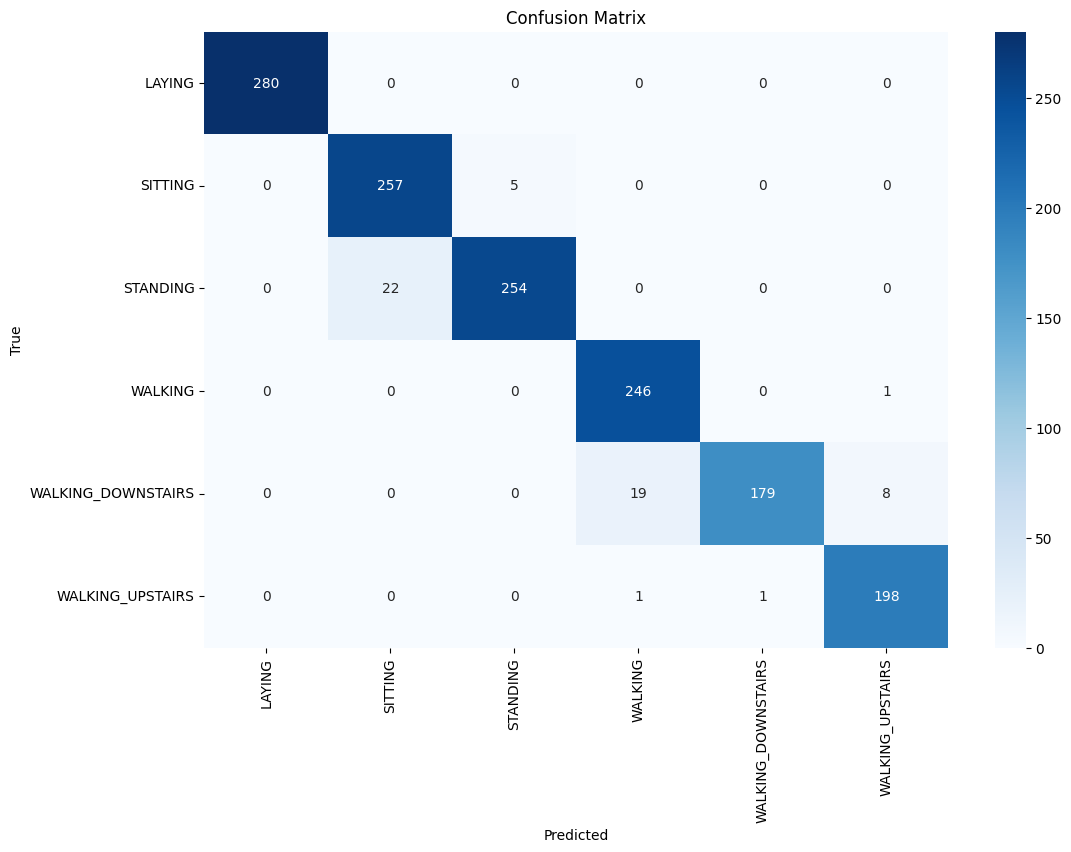

In [60]:
# Matriz de confusión
conf_matrix= confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
# Definición del modelo base
rf= RandomForestClassifier(random_state=42)

In [63]:
# Definición del rango de hiperparámetros
param_grid = {
    'n_estimators':[100, 200, 500],
    'max_depth':[10, 20, None],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'max_features':['auto', 'sqrt', 'log2']
}

In [64]:
# Búsqueda de hiperparámetros con GridSearchCV
grid_search= GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=5, n_jobs=-1, verbose=2, 
                          scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\DEIVY\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DEIVY\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DEIVY\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\DEIVY\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    vali

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=2)

In [66]:
# Mejores hiperparámetros
print("Mejores Parámetros: ",grid_search.best_params_)

Mejores Parámetros:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [68]:
# Evaluación del mejor modelo
best_model= grid_search.best_estimator_
y_pred= best_model.predict(X_test)
print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.97      0.95      0.96       262
           2       0.96      0.97      0.96       276
           3       1.00      0.99      1.00       247
           4       0.99      0.96      0.98       206
           5       0.99      0.99      0.99       200

   micro avg       0.98      0.98      0.98      1471
   macro avg       0.99      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471
 samples avg       0.98      0.98      0.98      1471

